<a href="https://colab.research.google.com/github/RehanKhan-007/Evaluation/blob/main/Predicting_Long_Term_Vaccine_Responses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [31]:
# Load the dataset
file_path = 'Longitudinal Vaccine Responses - Hinojosa, Fox.csv'
df = pd.read_csv(file_path)

# Filter the dataset for pre-vaccination (Day 0) measurements
day_0_data = df[df['Time'] == 'Day0']

# Create a new dataset with long-term responses (Days > 200) for each virus
long_term_data = df[df['Time'] > 'Day200']

# Merge the pre-vaccination and long-term datasets on common columns
merged_data = pd.merge(day_0_data, long_term_data, on=['Dataset', 'Virus', 'Subject'])

# Replace '-' with 0 in the Measurement columns and convert to numeric
merged_data['Measurement_x'] = pd.to_numeric(merged_data['Measurement_x'].replace('-', '0'))
merged_data['Measurement_y'] = pd.to_numeric(merged_data['Measurement_y'].replace('-', '0'))

# Convert Measurement columns to numeric
merged_data['Measurement_x'] = pd.to_numeric(merged_data['Measurement_x'])
merged_data['Measurement_y'] = pd.to_numeric(merged_data['Measurement_y'])

# Choose features (pre-vaccination measurements) and target (long-term responses)
features = merged_data[['Measurement_x', 'Age_x']]  # Adjust features as needed
target = merged_data['Measurement_y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.02, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 19336.027423481515


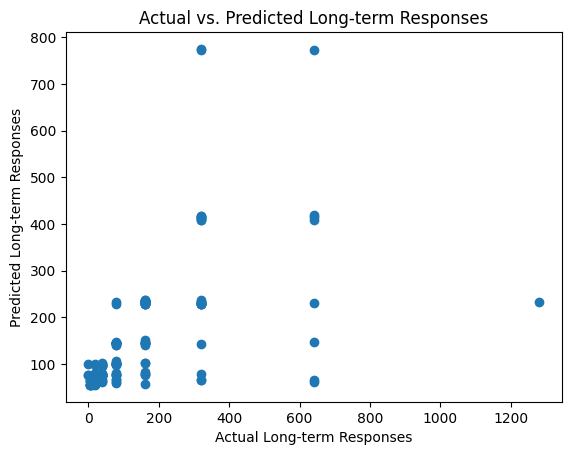

In [32]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Long-term Responses')
plt.ylabel('Predicted Long-term Responses')
plt.title('Actual vs. Predicted Long-term Responses')
plt.show()

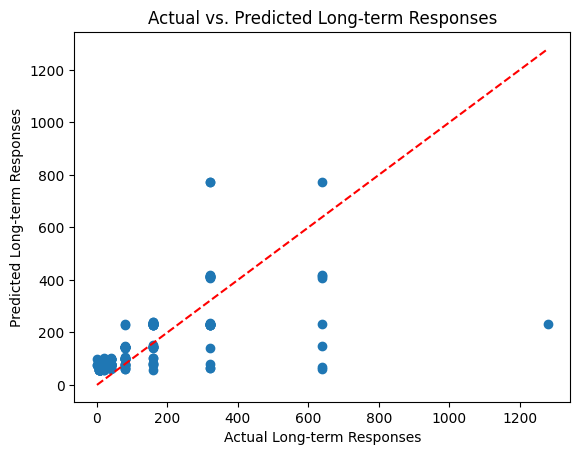

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Long-term Responses')
plt.ylabel('Predicted Long-term Responses')
plt.title('Actual vs. Predicted Long-term Responses')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Add diagonal line for reference
plt.show()

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'Longitudinal Vaccine Responses - Hinojosa, Fox.csv'
df = pd.read_csv(file_path)

# Filter the dataset for pre-vaccination (Day 0) measurements
day_0_data = df[df['Time'] == 'Day0']

# Create a new dataset with long-term responses (Days > 200) for each virus
long_term_data = df[df['Time'] > 'Day200']

# Merge the pre-vaccination and long-term datasets on common columns
merged_data = pd.merge(day_0_data, long_term_data, on=['Dataset', 'Virus', 'Subject'])

# Replace '-' with 0 in the Measurement columns and convert to numeric
merged_data['Measurement_x'] = pd.to_numeric(merged_data['Measurement_x'].replace('-', '0'))
merged_data['Measurement_y'] = pd.to_numeric(merged_data['Measurement_y'].replace('-', '0'))

# Convert Measurement columns to numeric
merged_data['Measurement_x'] = pd.to_numeric(merged_data['Measurement_x'])
merged_data['Measurement_y'] = pd.to_numeric(merged_data['Measurement_y'])

# Impute missing values if any
imputer = SimpleImputer(strategy='mean')
merged_data[['Measurement_x', 'Age_x']] = imputer.fit_transform(merged_data[['Measurement_x', 'Age_x']])

# Standardize features
scaler = StandardScaler()
merged_data[['Measurement_x', 'Age_x']] = scaler.fit_transform(merged_data[['Measurement_x', 'Age_x']])

# Choose features (pre-vaccination measurements) and target (long-term responses)
features = merged_data[['Measurement_x', 'Age_x']]  # Adjust features as needed
target = merged_data['Measurement_y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.02, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 22486.11941118307
